# **Predicting Accident Severity with Logistic Regression**

#### Dataset Link: https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction/data

#### Github Repository Link: https://github.com/akhil9390/Predicting-Traffic-Accidents-Outcomes

# Data Loading

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the CSV file
file_path = 'dataset_traffic_accident.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(dataset.head())

First few rows of the dataset:
  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          C

# Cleaning the Data

In [6]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
# We can either drop rows with missing target values (Accident) or impute missing values in other columns
imputer = SimpleImputer(strategy='most_frequent')  # 'most_frequent' will fill missing values with the most frequent value in each column

# Apply imputation to all columns except the target variable (Accident)
dataset_cleaned = dataset.copy()
dataset_cleaned = dataset_cleaned.dropna(subset=['Accident'])  # Dropping rows where the target variable 'Accident' is missing
dataset_cleaned[dataset_cleaned.columns] = imputer.fit_transform(dataset_cleaned[dataset_cleaned.columns])

# Encode categorical variables (Weather, Road_Type, Road_Condition, Vehicle_Type, etc.)
# Use Label Encoding or One-Hot Encoding
label_encoder = LabelEncoder()

# Encode 'Weather', 'Road_Type', 'Accident_Severity', 'Road_Condition', and 'Vehicle_Type'
categorical_columns = ['Weather', 'Road_Type', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Time_of_Day', 'Road_Light_Condition']
for col in categorical_columns:
    dataset_cleaned[col] = label_encoder.fit_transform(dataset_cleaned[col])

# Check if all categorical variables have been encoded
print("\nEncoded Categorical Columns:")
print(dataset_cleaned[categorical_columns].head())

# Feature scaling for numerical variables (Driver_Age, Driver_Experience, Speed_Limit, etc.)
scaler = StandardScaler()

# Columns to scale
numerical_columns = ['Driver_Age', 'Driver_Experience', 'Speed_Limit', 'Number_of_Vehicles', 'Traffic_Density']
dataset_cleaned[numerical_columns] = scaler.fit_transform(dataset_cleaned[numerical_columns])

# Output the first few rows of the cleaned data
print("\nFirst few rows of cleaned data:")
print(dataset_cleaned.head())


Encoded Categorical Columns:
   Weather  Road_Type  Accident_Severity  Road_Condition  Vehicle_Type  \
0        2          0                  1               3             1   
1        0          3                  2               3             3   
2        2          1                  1               1             1   
3        0          0                  1               2             0   
4        2          1                  1               0             1   

   Time_of_Day  Road_Light_Condition  
0            2                     0  
1            3                     0  
2            1                     0  
3            0                     1  
4            2                     0  

First few rows of cleaned data:
   Weather  Road_Type  Time_of_Day  Traffic_Density  Speed_Limit  \
0        2          0            2        -0.014651     0.943602   
1        0          3            3        -0.014651     1.583087   
2        2          1            1        -0.014651   

# Exploratory Data Analysis - EDA


Summary statistics of the cleaned dataset:
          Weather   Road_Type  Time_of_Day  Traffic_Density   Speed_Limit  \
count  798.000000  798.000000   798.000000     7.980000e+02  7.980000e+02   
mean     1.171679    1.072682     1.107769     3.116416e-17  1.892109e-16   
std      1.241018    0.949004     1.055981     1.000627e+00  1.000627e+00   
min      0.000000    0.000000     0.000000    -1.313676e+00 -1.294597e+00   
25%      0.000000    0.000000     0.000000    -1.313676e+00 -6.551120e-01   
50%      1.000000    1.000000     1.000000    -1.465066e-02 -3.353693e-01   
75%      2.000000    1.000000     2.000000     1.284374e+00  3.041162e-01   
max      4.000000    3.000000     3.000000     1.284374e+00  4.556695e+00   

       Number_of_Vehicles  Accident_Severity  Road_Condition  Vehicle_Type  \
count        7.980000e+02         798.000000      798.000000    798.000000   
mean         1.113006e-17           1.199248        0.931078      1.314536   
std          1.000627e+00   

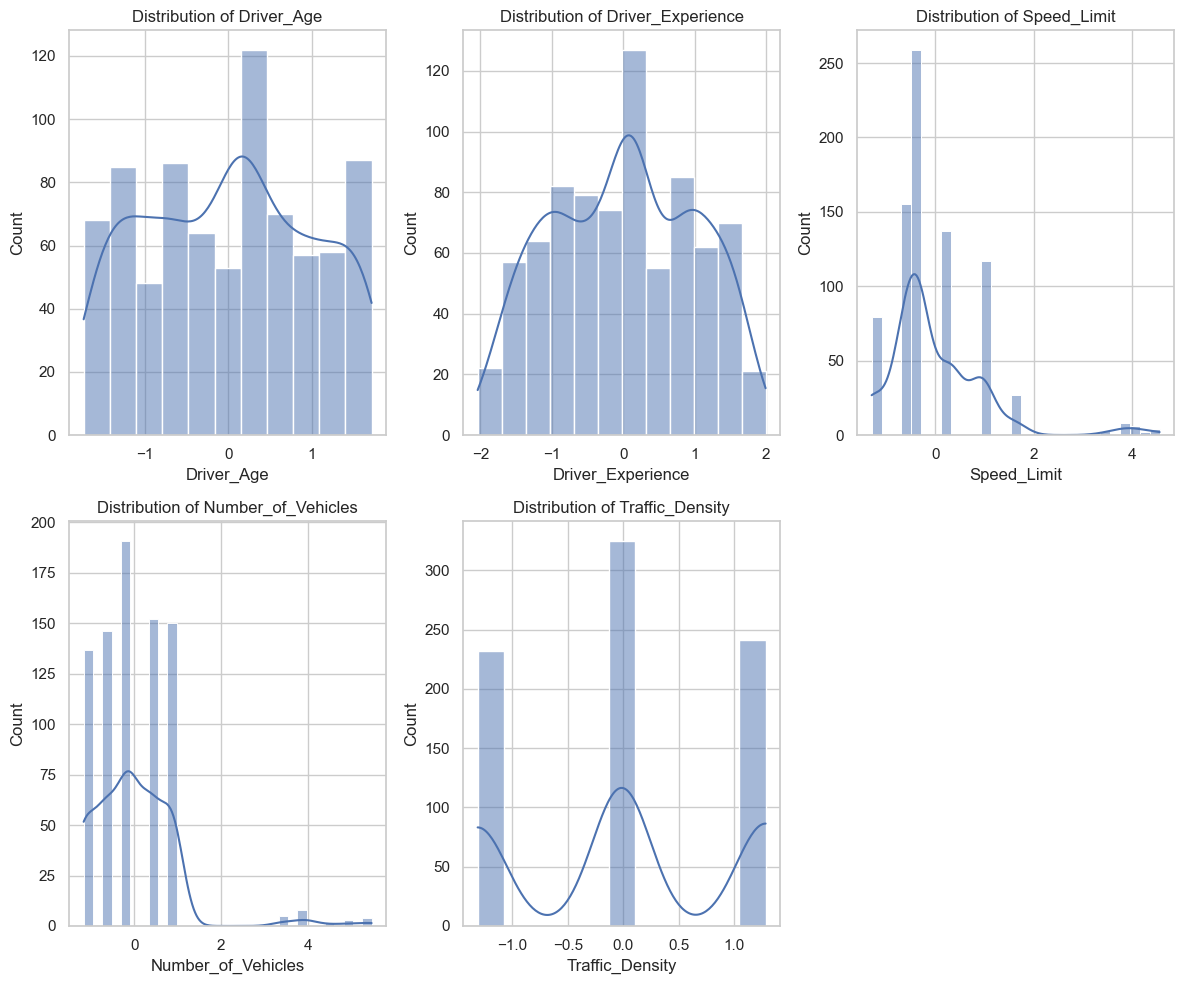

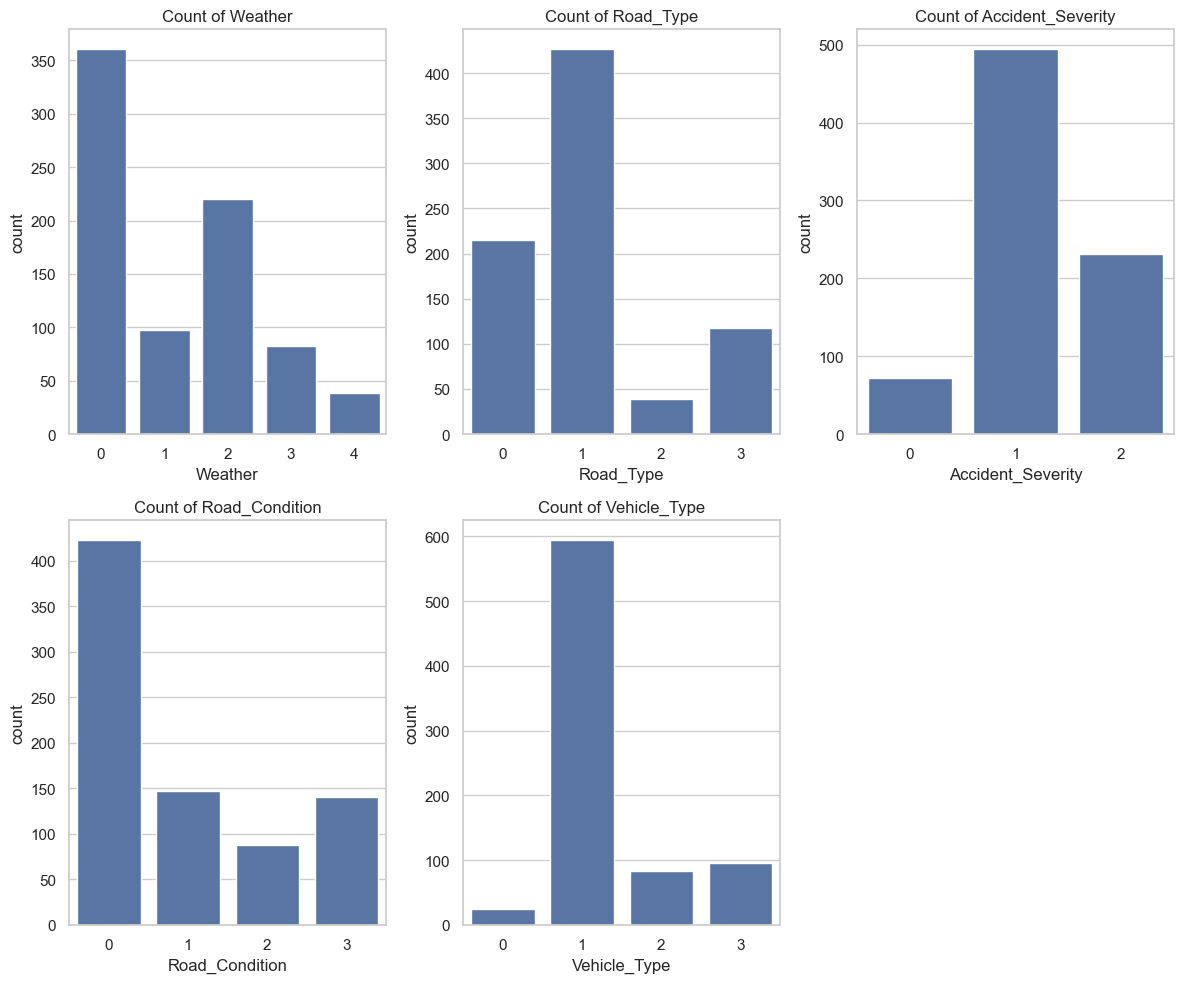

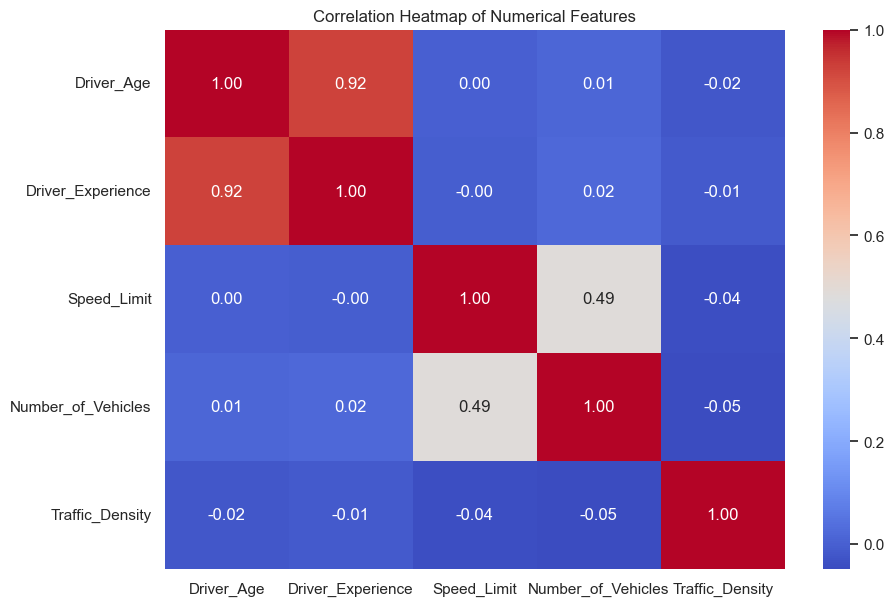

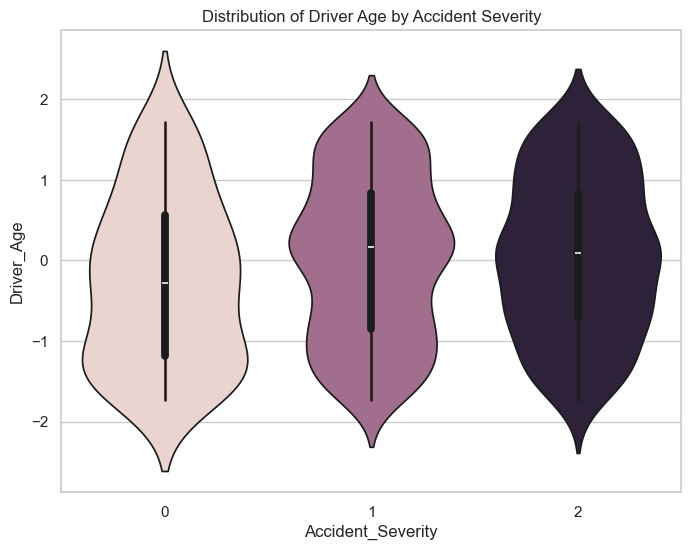

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualization
sns.set(style="whitegrid")

# 1. Summary statistics of numerical features
print("\nSummary statistics of the cleaned dataset:")
print(dataset_cleaned.describe())

# 2. Distribution plots for numerical features
numerical_columns = ['Driver_Age', 'Driver_Experience', 'Speed_Limit', 'Number_of_Vehicles', 'Traffic_Density']

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# 3. Count plots for categorical features
categorical_columns = ['Weather', 'Road_Type', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type']

plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=dataset_cleaned[column])
    plt.title(f'Count of {column}')
    plt.tight_layout()
plt.show()

# 4. Correlation heatmap for numerical variables
correlation_matrix = dataset_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Violin plot to visualize the distribution of 'Driver_Age' across different 'Accident_Severity' categories
plt.figure(figsize=(8, 6))
sns.violinplot(x='Accident_Severity', y='Driver_Age', data=dataset_cleaned, hue='Accident_Severity', legend=False)
plt.title('Distribution of Driver Age by Accident Severity')
plt.show()

# Logistic Regression Implementation

## Splitting the Data

In [11]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Define the feature matrix (X) and target variable (y)
X = dataset_cleaned.drop(columns=['Accident'])  # Features (excluding the target variable)
y = dataset_cleaned['Accident']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the split data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (638, 13)
Test set shape: (160, 13)


## Feature Selection

In [13]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Ensure that 'Accident' is binary (0 or 1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encode target variable

# Create a Logistic Regression model
logreg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Apply Recursive Feature Elimination (RFE)
selector = RFE(logreg, n_features_to_select=10)  # Select top 10 features
X_selected_rfe = selector.fit_transform(X_train, y_train)

# Get the names of the selected features
selected_features_rfe = X_train.columns[selector.support_]

# Output the selected features
print("Selected Features using RFE:", selected_features_rfe)

Selected Features using RFE: Index(['Weather', 'Road_Type', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Accident_Severity', 'Road_Condition',
       'Vehicle_Type', 'Driver_Age', 'Driver_Experience'],
      dtype='object')


## Training the Model

In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Standardize the features
scaler = StandardScaler()

# Scale the selected features (train and test)
X_train_scaled = scaler.fit_transform(X_train[selected_features_rfe])  # Use the selected features
X_test_scaled = scaler.transform(X_test[selected_features_rfe])  # Scale test set based on training data

# Create a Logistic Regression model
logreg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Train the model using the scaled training set
logreg.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_scaled)

print("Trained the Logistic Regression Model Successfully")

Trained the Logistic Regression Model Successfully


## Model Evaluation

In [28]:
# Ensure the target variable (y_test) is binary (0 or 1)
y_test = label_encoder.fit_transform(y_test)  # Encode y_test to 0 or 1 if necessary

# Create a Logistic Regression model with class weights for handling class imbalance
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')

# Train the model using the scaled training set
logreg.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_scaled)

# Ensure the predictions are binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model using different metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=1)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.51
Precision: 0.32
Recall: 0.54
F1 Score: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       112
           1       0.32      0.54      0.40        48

    accuracy                           0.51       160
   macro avg       0.52      0.52      0.49       160
weighted avg       0.60      0.51      0.53       160


Confusion Matrix:
[[56 56]
 [22 26]]


## Model Visualizations

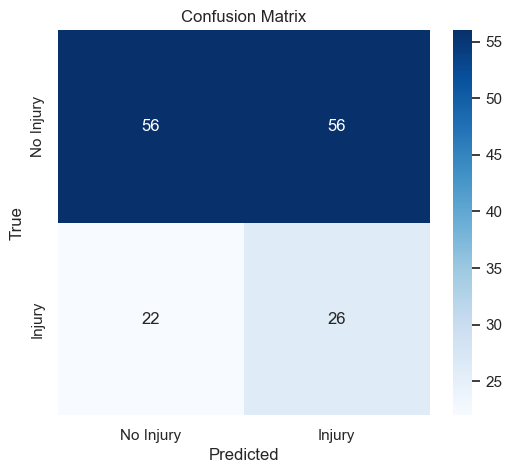

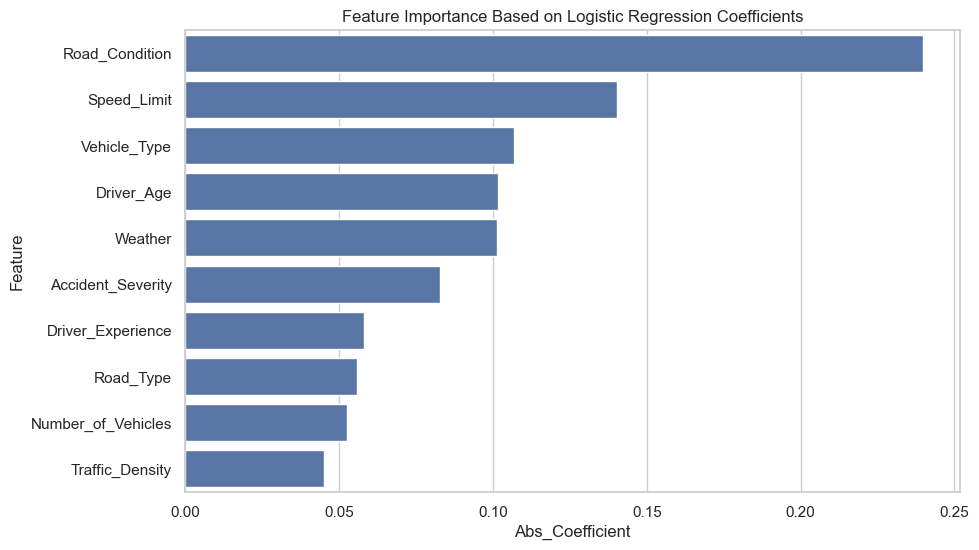

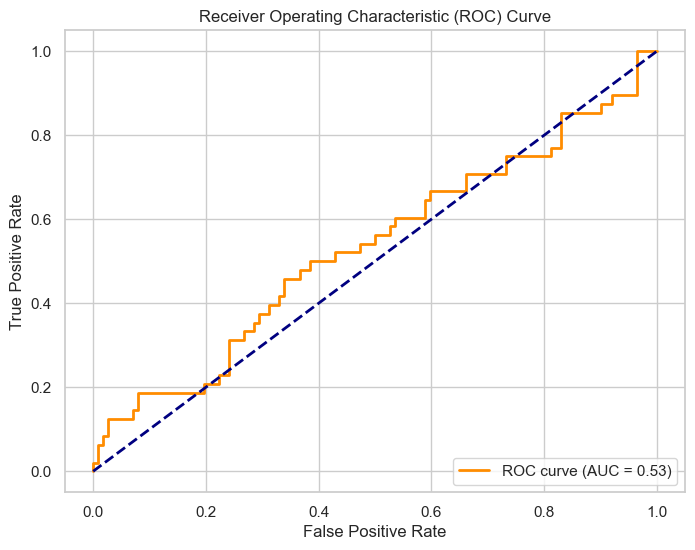

In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualizing Feature Importance Based on Logistic Regression Coefficients
# Get the coefficients of the Logistic Regression model
coefficients = logreg.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': selected_features_rfe, 'Coefficient': coefficients})

# Sort the features by absolute coefficient value (importance)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:,1])  # Get the probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()